<a href="https://colab.research.google.com/github/badstyle-goodstyle/data_engineering/blob/data_engine/data_engine_practice5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # some imports to set up
import seaborn as sns # pip install seaborn
import warnings
warnings.filterwarnings('ignore')
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


In [8]:
flight_data = pd.read_csv('drive/MyDrive/data_engineering/flight_delays.csv')
flight_data.head(10)


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


Задача №1

Найти долю всех задержек ко всем вылетам

In [9]:
total_flights = flight_data.index.max() + 1
delayed_flights = flight_data[flight_data["dep_delayed_15min"] == 'Y']["dep_delayed_15min"].count()
proportion_flights = delayed_flights / total_flights
print(proportion_flights)

0.19044


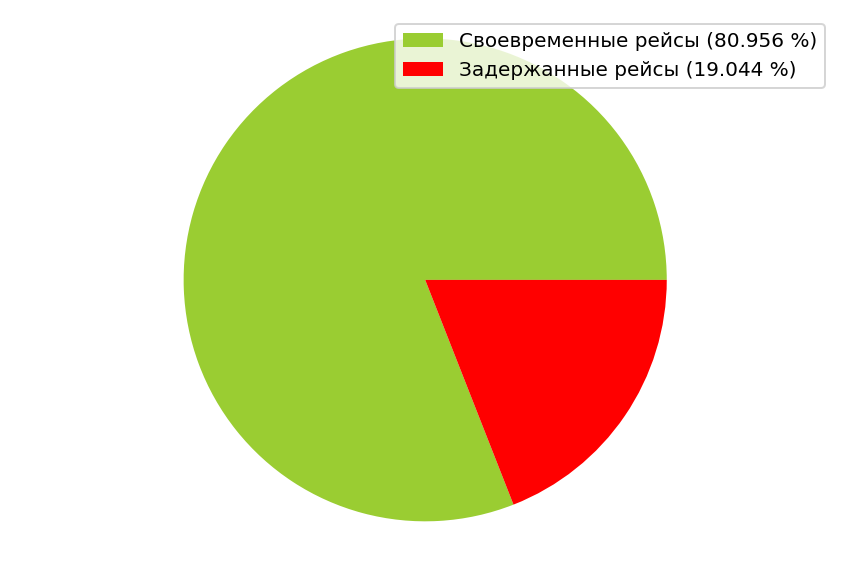

In [17]:
labels = [r'Своевременные рейсы (80.956 %)', r'Задержанные рейсы (19.044 %)']
patches, texts = plt.pie(flight_data.groupby('dep_delayed_15min')['dep_delayed_15min'].count(), colors = ['yellowgreen', 'red'])
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


Задача №2

Найти зависимость количества задержек от длины пути, который предстоит пролететь самолету

In [18]:
flight_data.delayed = 1 * flight_data["dep_delayed_15min"].eq('Y')
# Определяем корреляцию данных между 2 столбцами
flight_data["Distance"].corr(flight_data.delayed)
# Значение крайне низкое => зависимость несущественная

-0.0027342966845767033

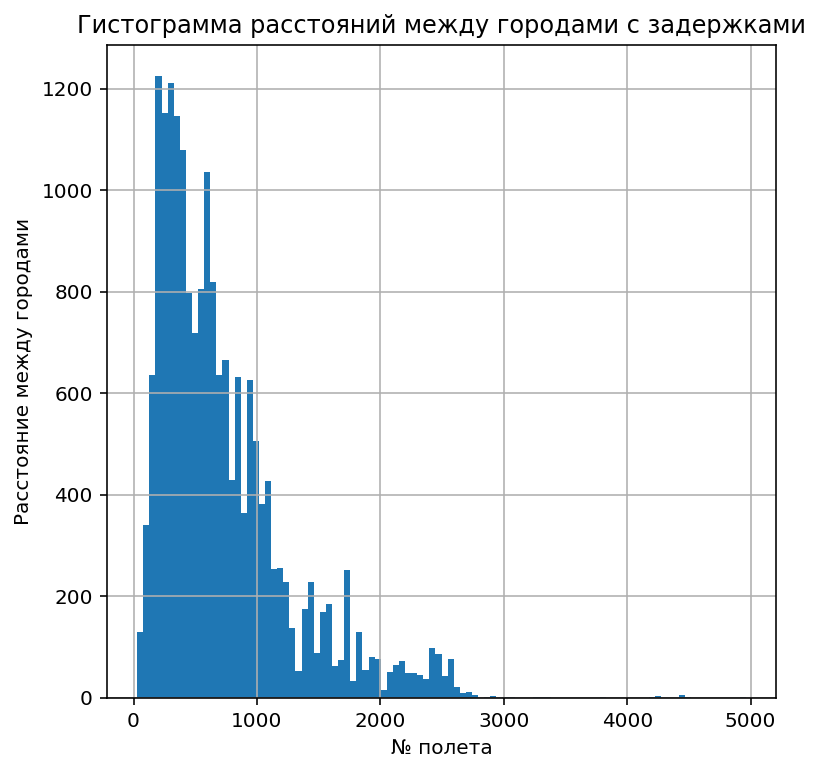

In [39]:
delayed_flights = flight_data[flight_data.delayed == 1]
plt.title('Гистограмма расстояний между городами с задержками')
plt.xlabel('№ полета')
plt.ylabel('Расстояние между городами')
delayed_flights['Distance'].hist(figsize=(6, 6), bins=100);
plt.show()

Задача №3

Найти топ 5 направлений, для которых чаще всего происходят задержки

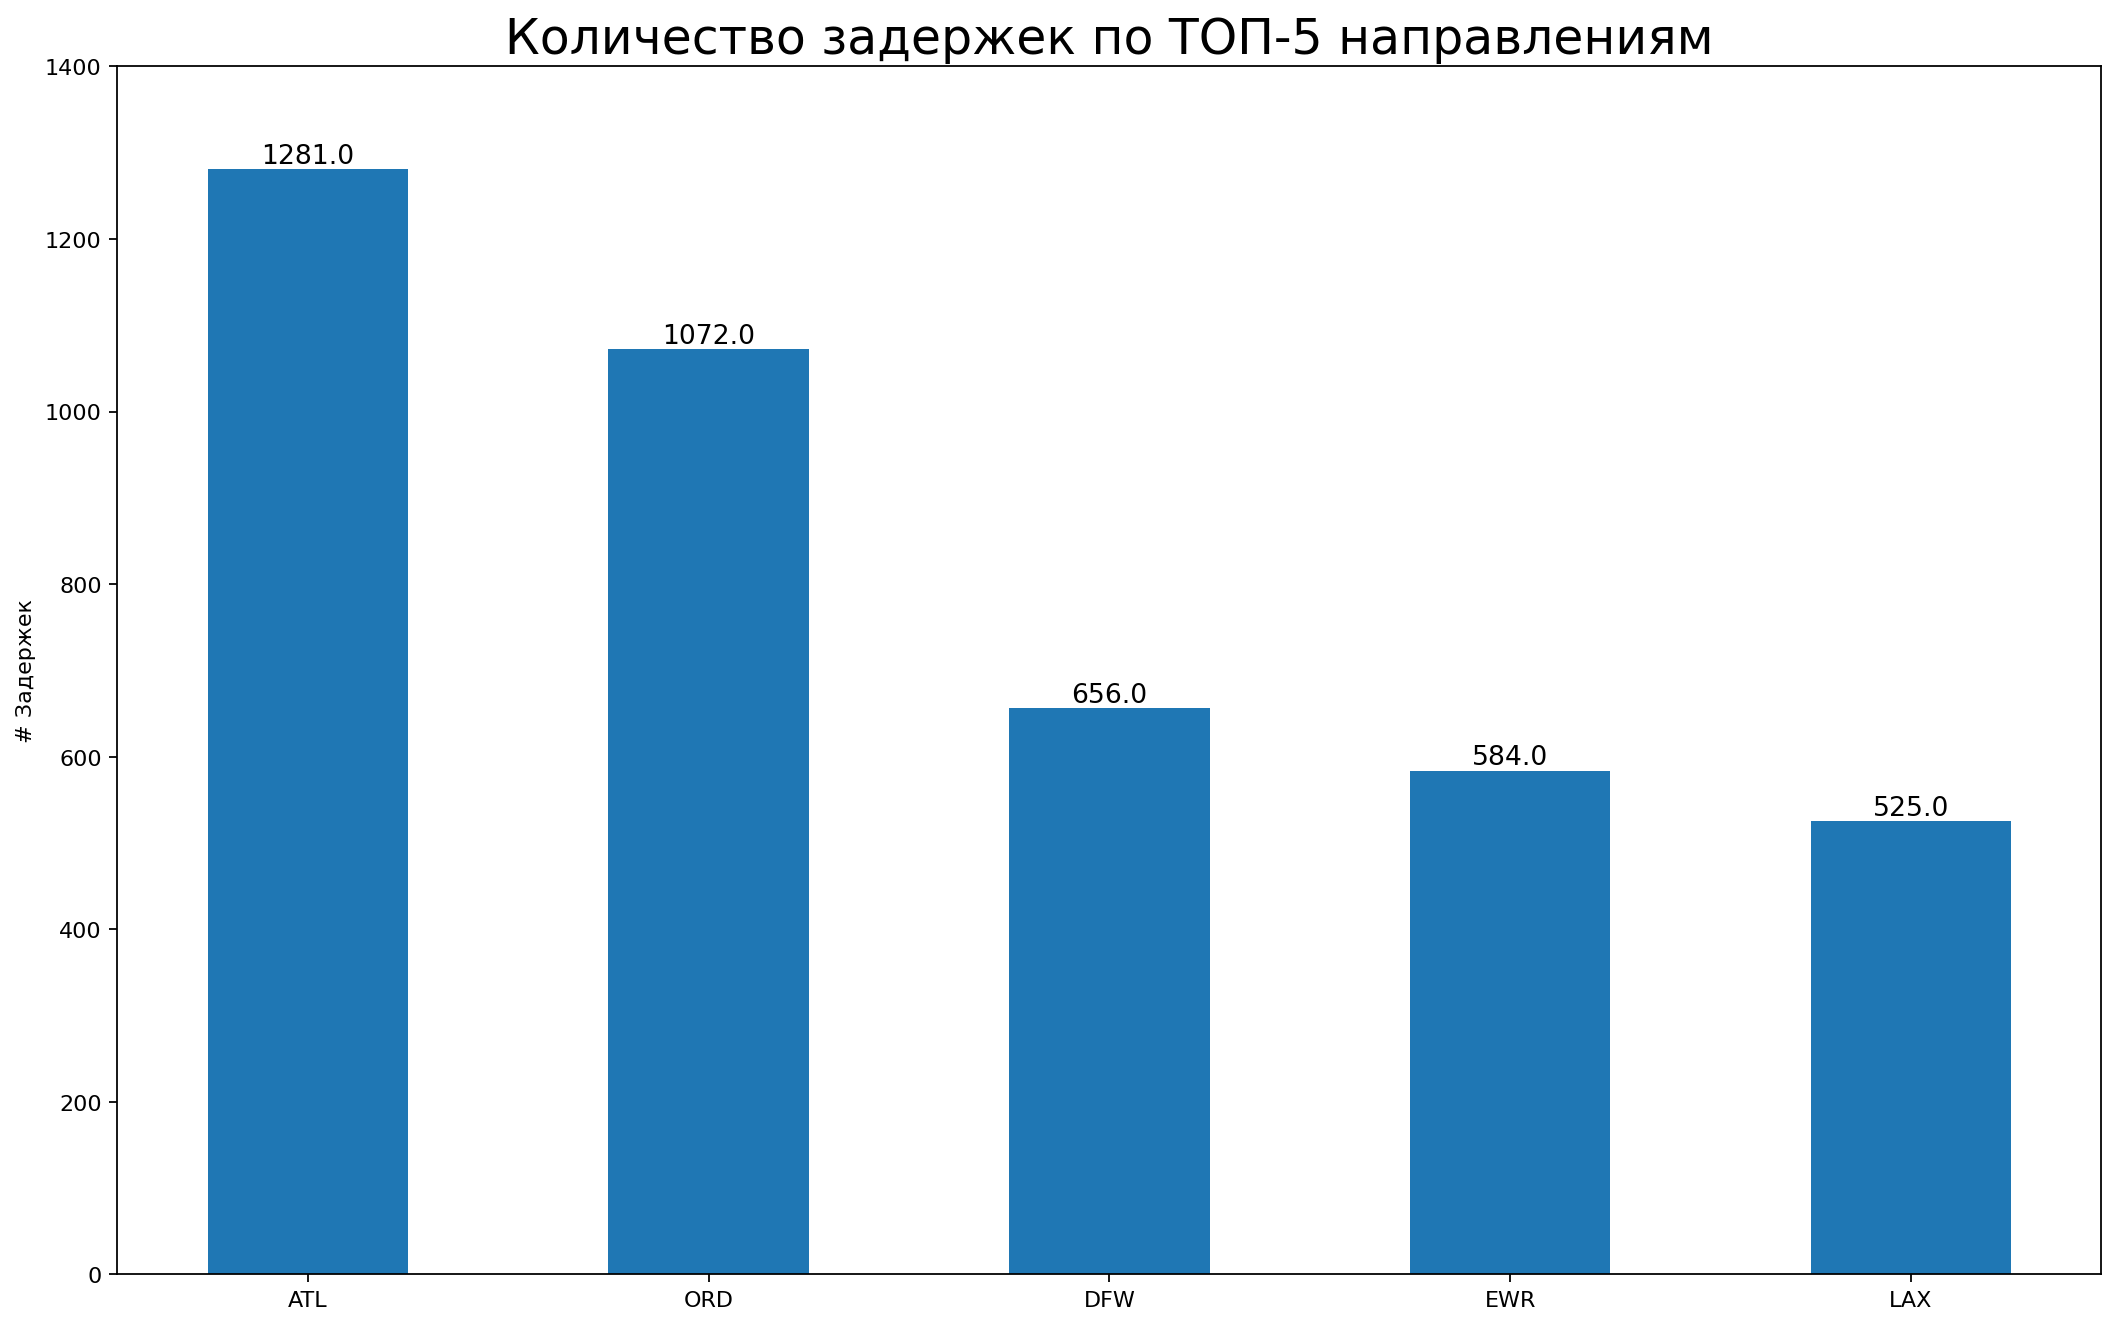

In [73]:
obj = flight_data[flight_data['dep_delayed_15min'].eq('Y')]['Dest'].value_counts()[:5]
names = obj.index
values = obj.values

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(names, values, width=.5)
for i, val in enumerate(obj):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.title("Количество задержек по ТОП-5 направлениям", fontsize=22)
plt.ylabel('# Задержек')
plt.ylim(0, 1400)
plt.show()

Задача №4

В какие времена года чаще всего происходят задержки рейсов

In [76]:
flight_delayed = flight_data[flight_data["dep_delayed_15min"] == "Y"]

def get_season(obj):
  month = int(obj["Month"][2:])
  if month in [1, 2, 12]:
    return "Зима"
  elif month in [3, 4, 5]:
    return "Весна"
  elif month in [6, 7, 8]:
    return "Лето"
  elif month in [9, 10, 11]:
    return "Осень"
  else:
    return "Unknown"

obj = flight_delayed.apply(get_season, axis = 1).value_counts()
obj

Лето     5723
Зима     4849
Весна    4295
Осень    4177
dtype: int64

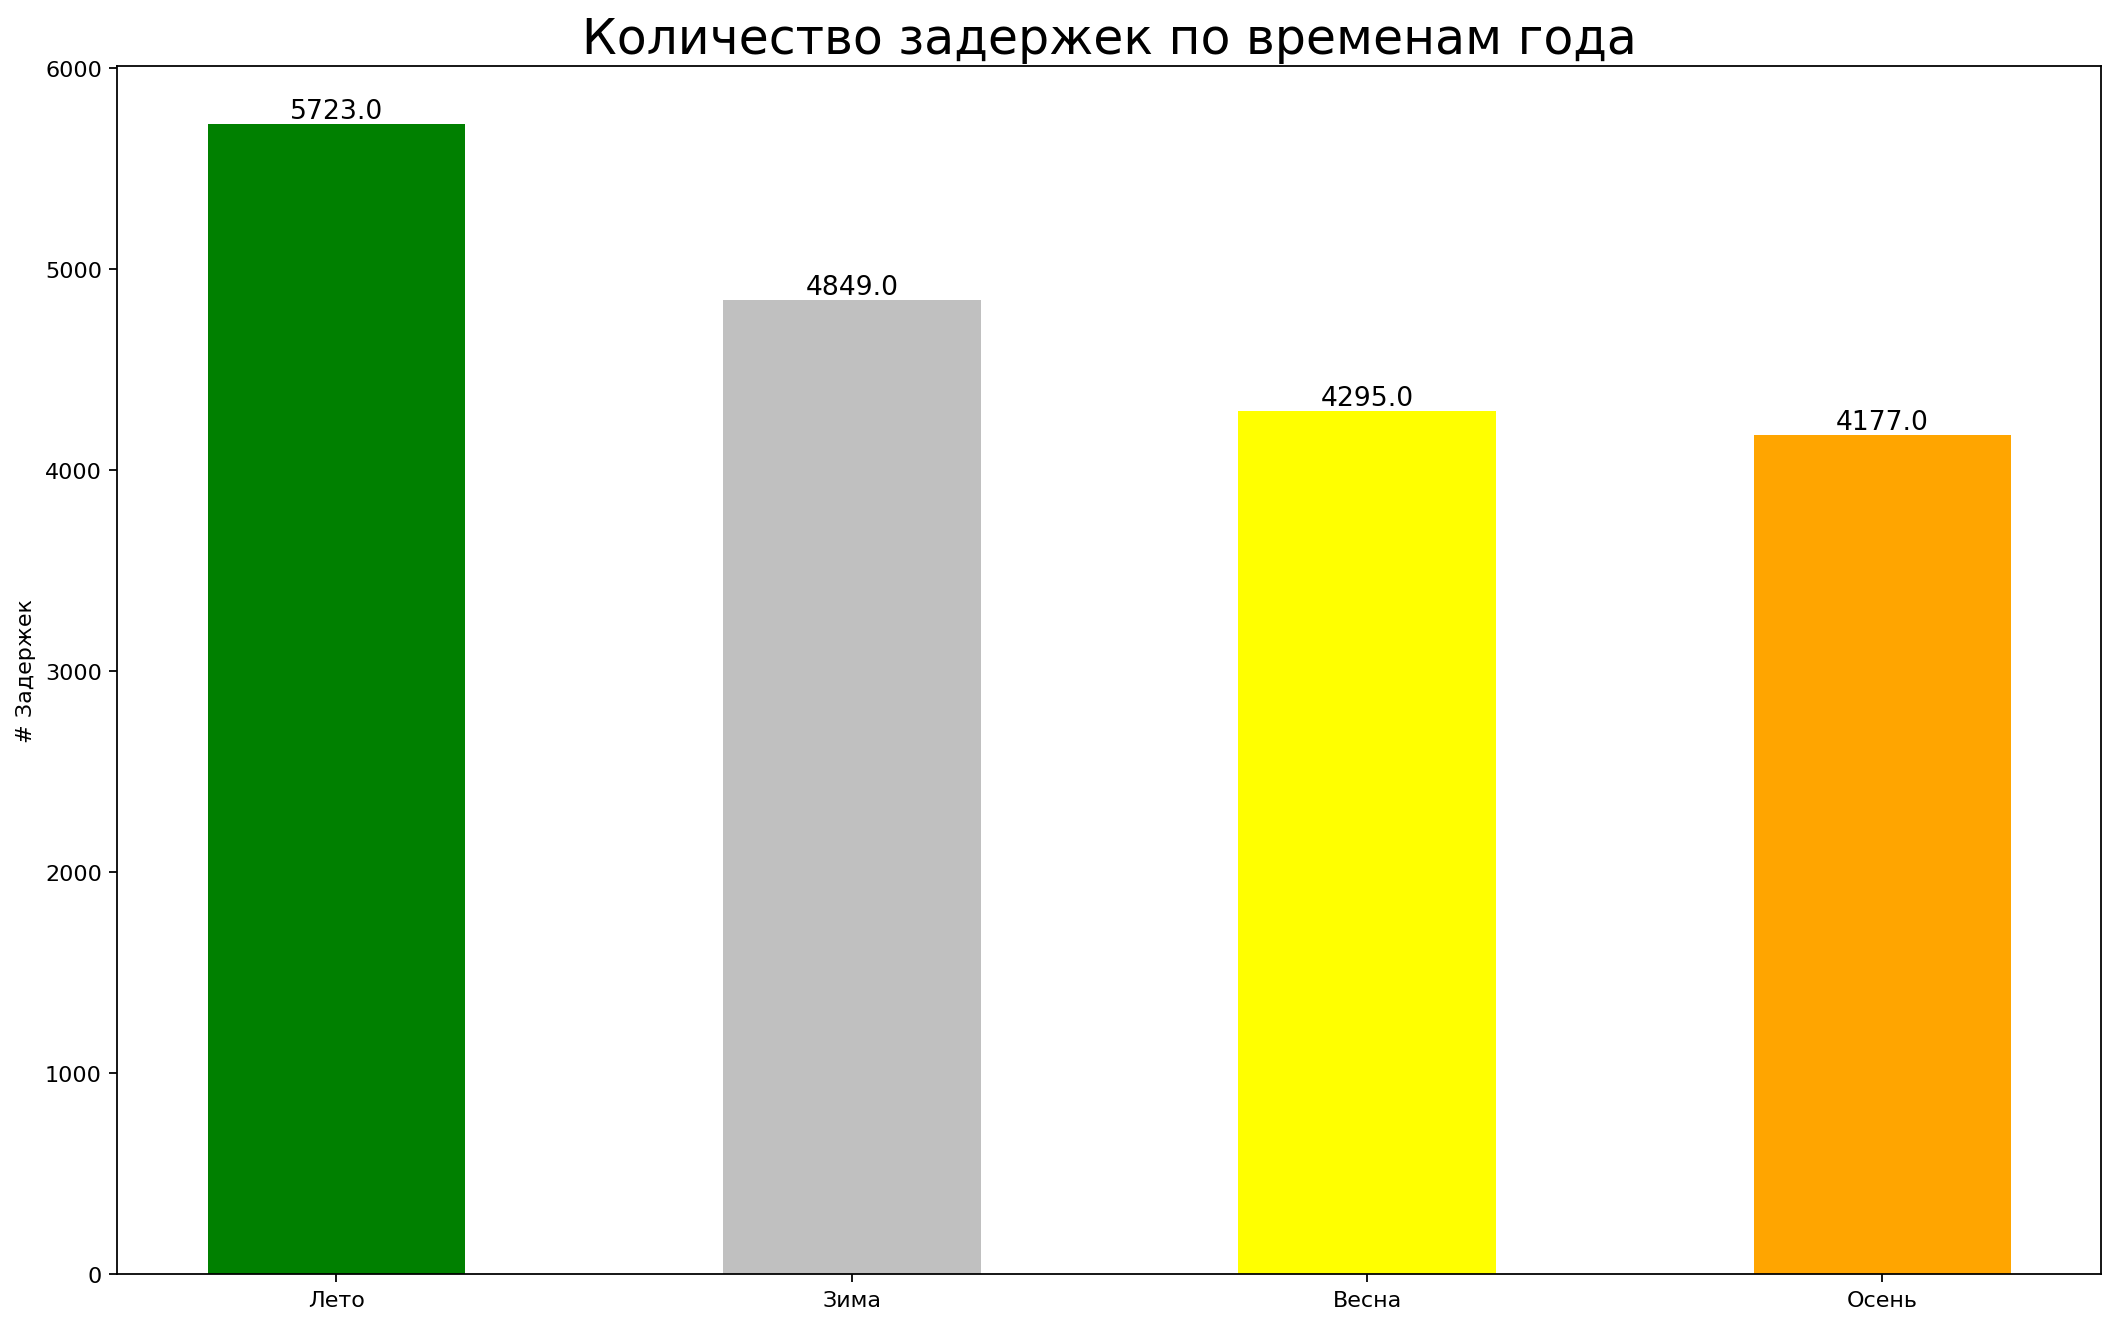

In [81]:
obj = flight_delayed.apply(get_season, axis = 1).value_counts()
names = obj.index
values = obj.values

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(names, values, color=['green', 'silver', 'yellow', 'orange'], width=.5)
for i, val in enumerate(obj):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.title("Количество задержек по временам года", fontsize=22)
plt.ylabel('# Задержек')
plt.show()

Задача №5

Найти топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы

In [82]:
flight_delayed['UniqueCarrier'].value_counts()[-1:-11:-1]

AQ     18
HA     33
TZ     64
DH    156
F9    156
HP    196
B6    393
YV    478
AS    541
FL    736
Name: UniqueCarrier, dtype: int64

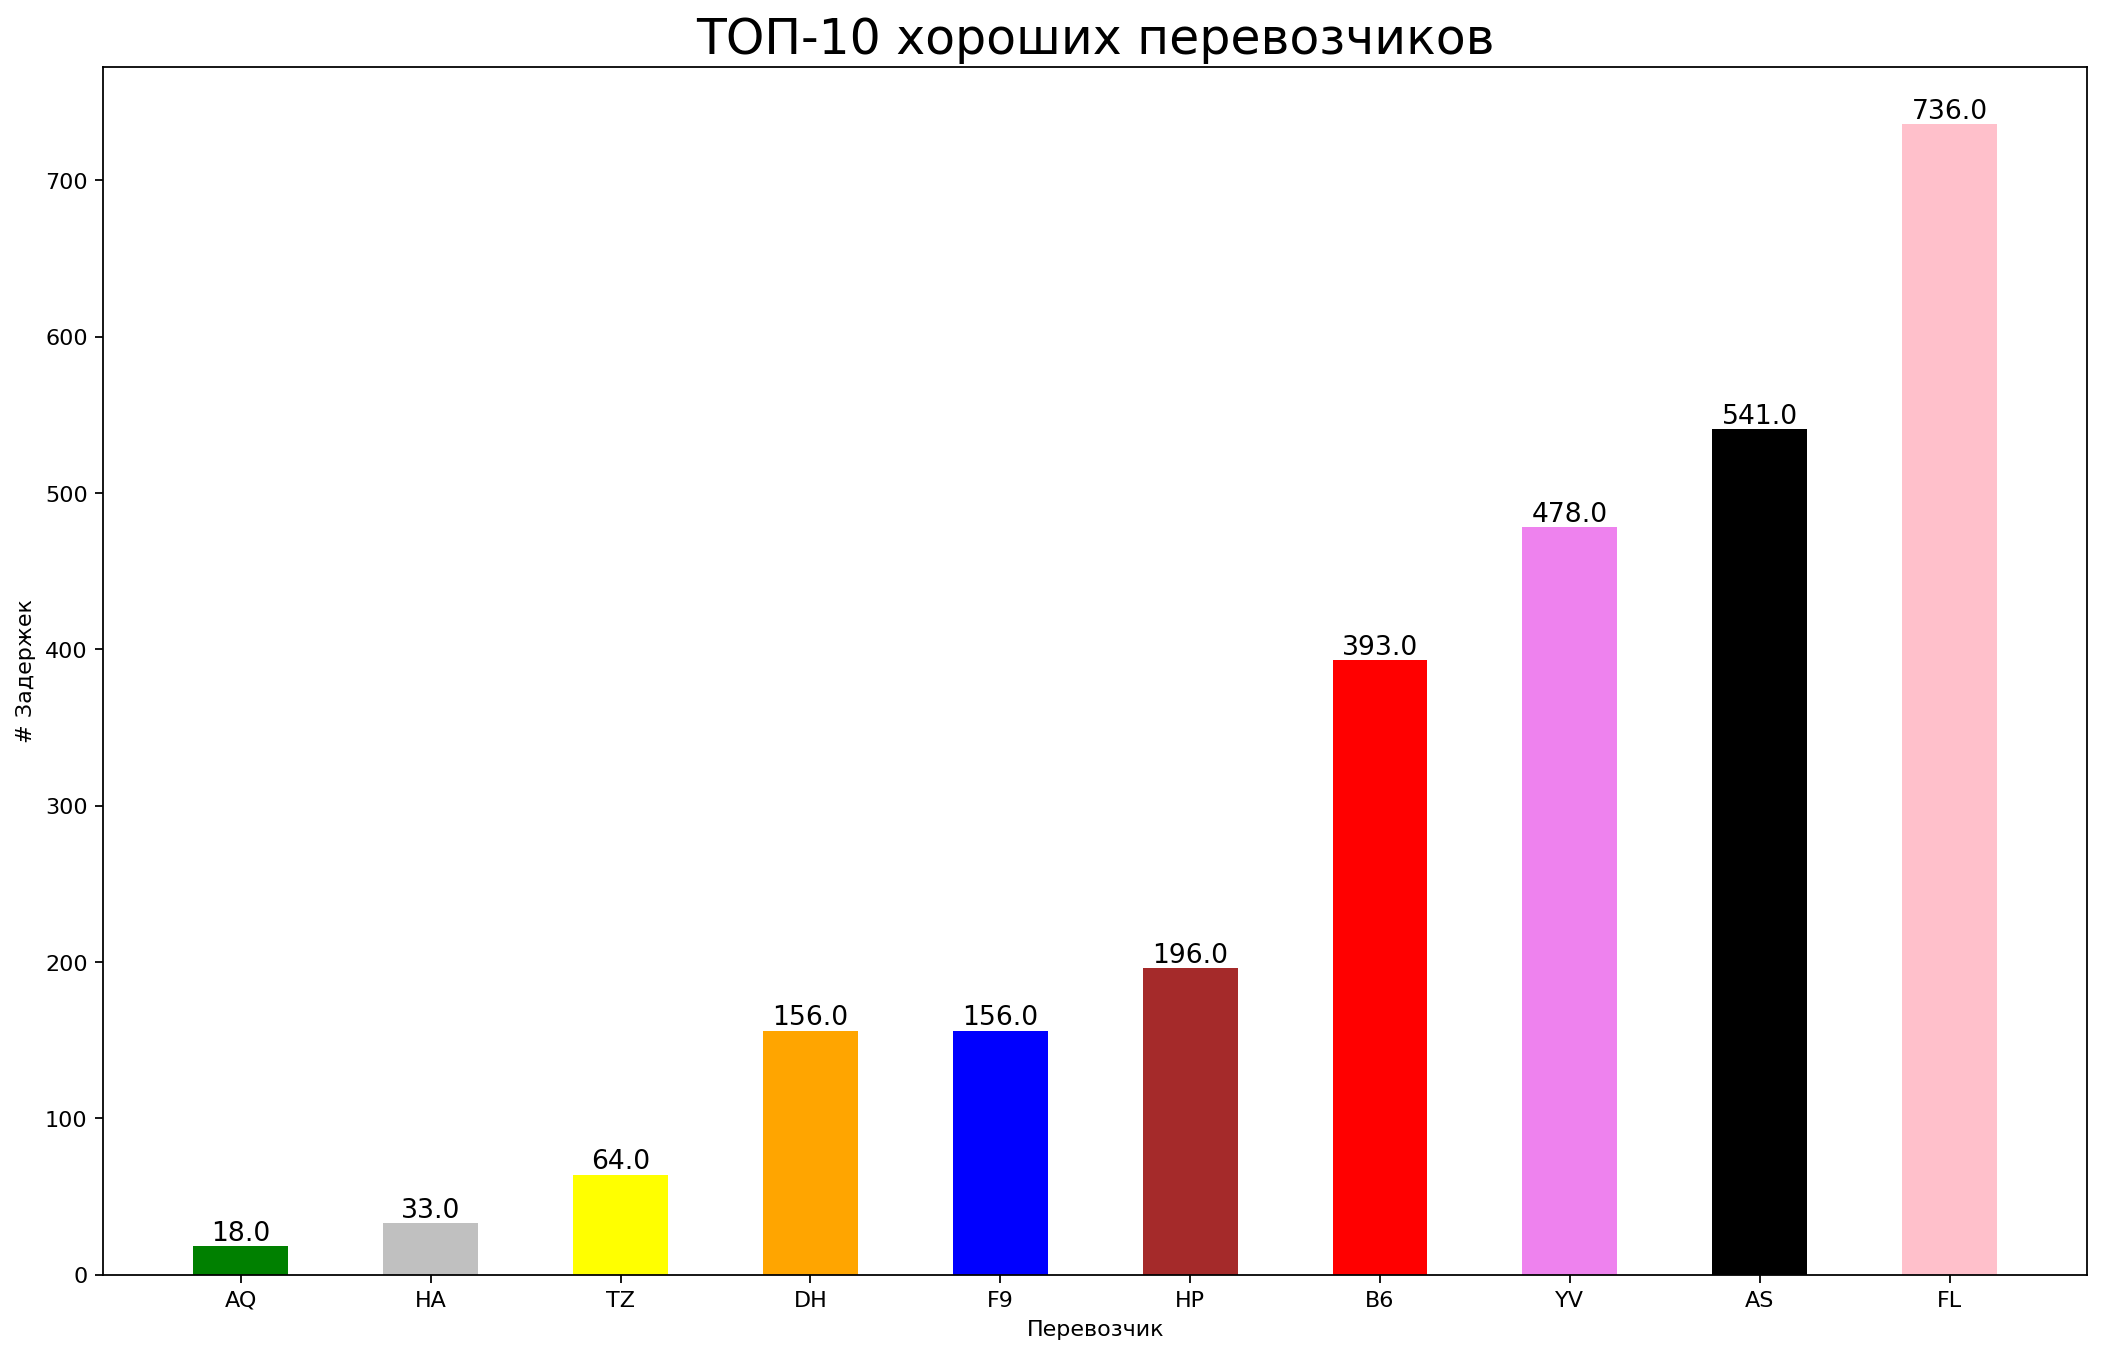

In [85]:
obj = flight_delayed['UniqueCarrier'].value_counts()[-1:-11:-1]
names = obj.index
values = obj.values

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(names, values, color=['green', 'silver', 'yellow', 'orange', 'blue', 'brown', 'red', 'violet', 'black', 'pink'], width=.5)
for i, val in enumerate(obj):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.title("ТОП-10 хороших перевозчиков", fontsize=22)
plt.ylabel('# Задержек')
plt.xlabel('Перевозчик')
plt.show()

Задача №6

Найти топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки

In [86]:
flight_delayed['Origin'].value_counts()[:10]

ATL    1506
ORD    1254
DFW     902
DEN     575
LAX     552
LAS     546
EWR     538
IAH     492
PHX     491
DTW     401
Name: Origin, dtype: int64

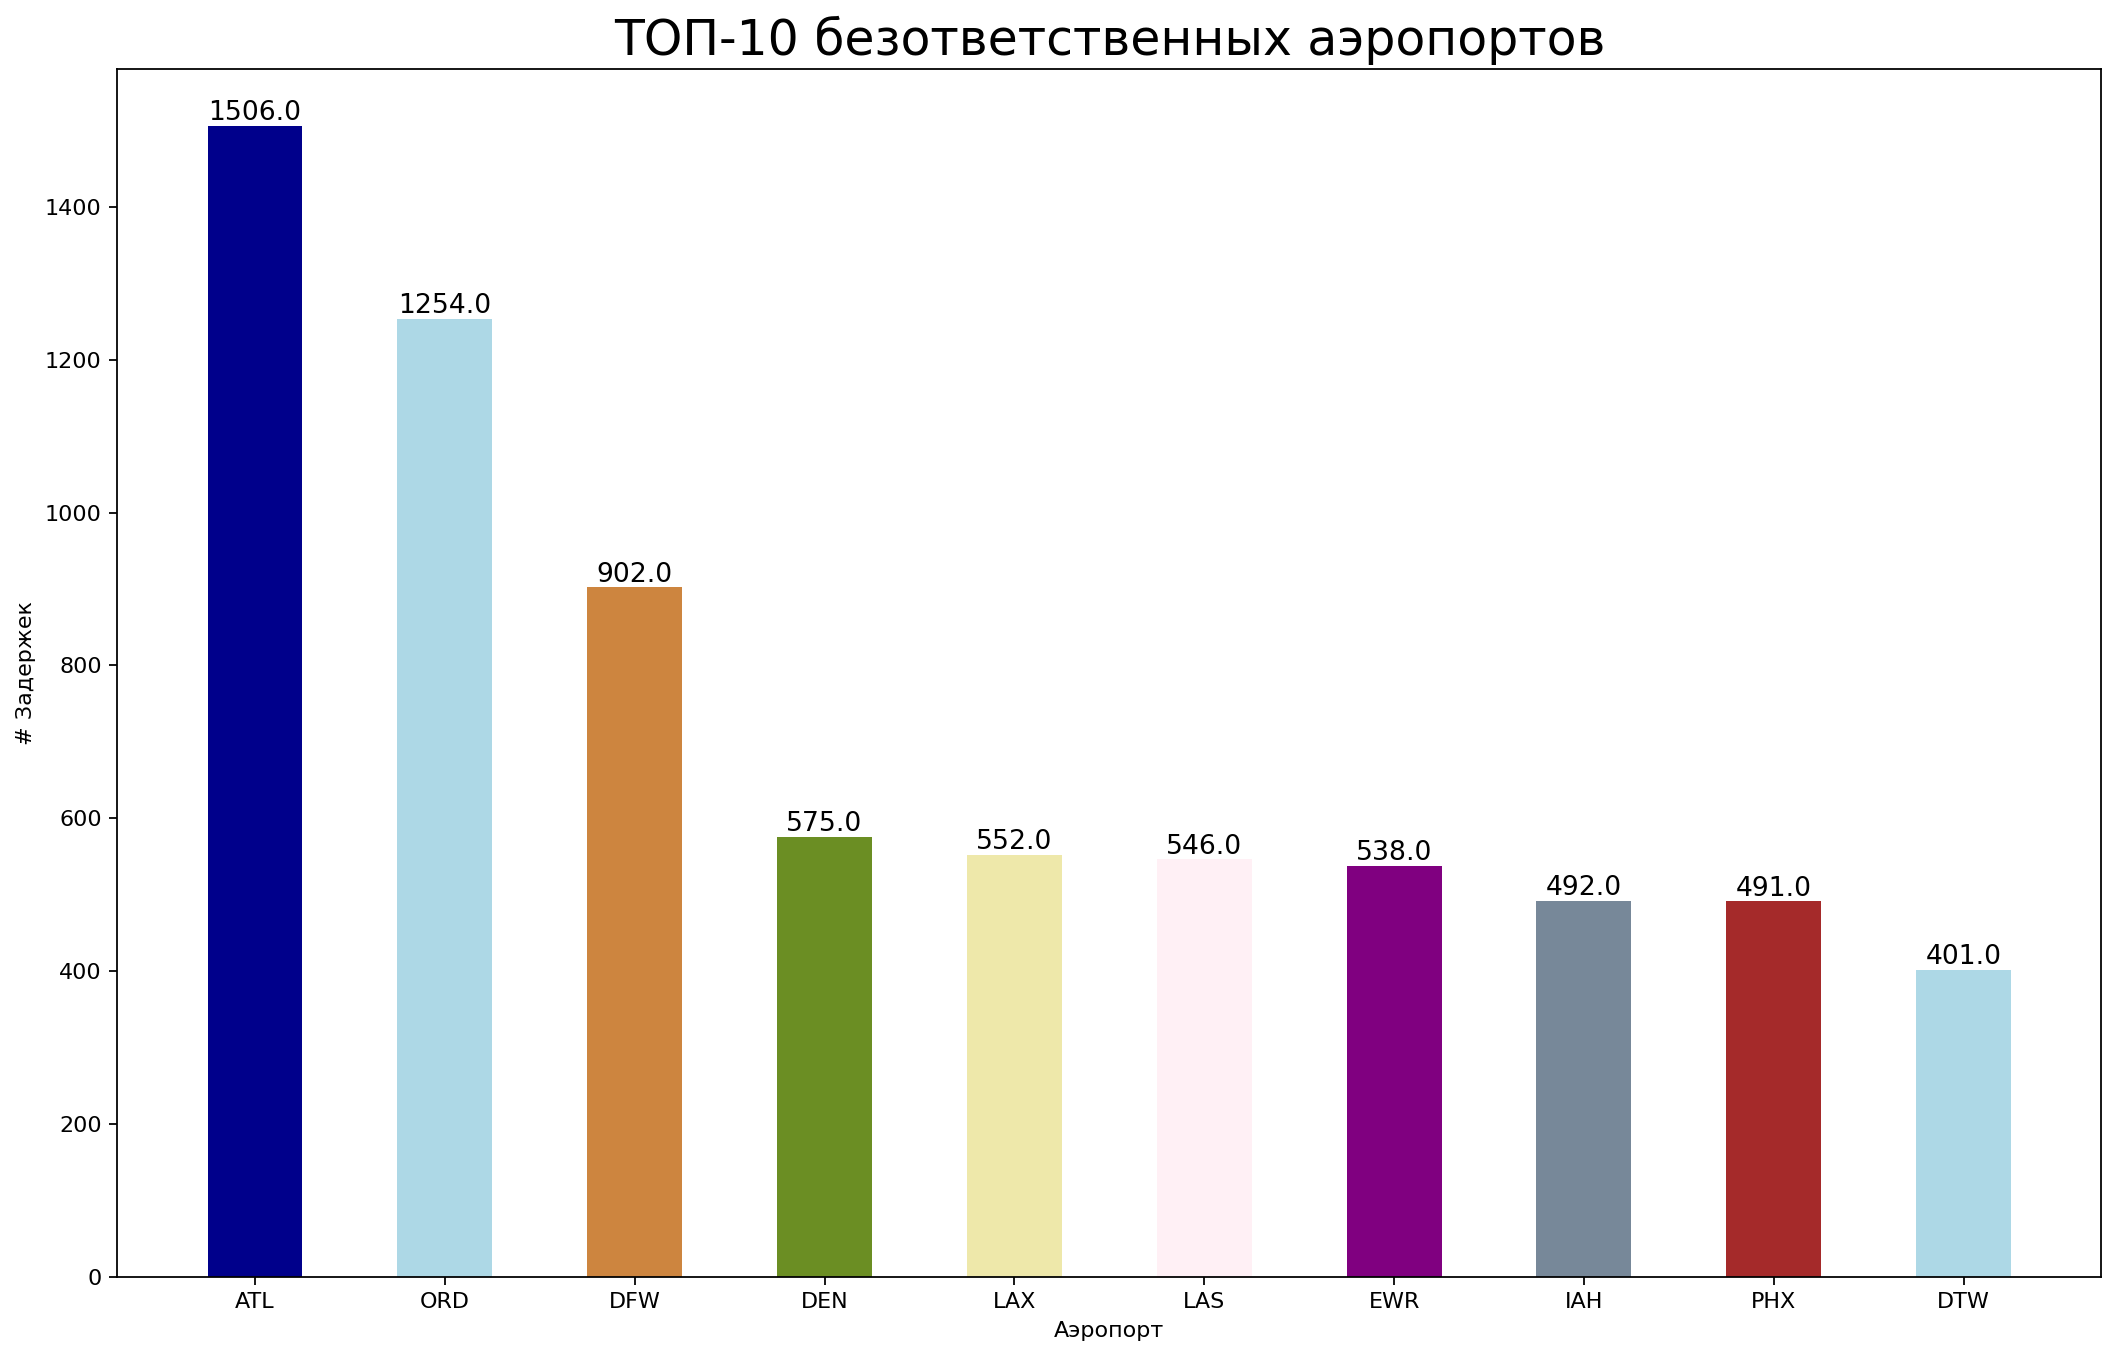

In [92]:
import random

all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
rc = random.choices(all_colors, k=10)

obj = flight_delayed['Origin'].value_counts()[:10]
names = obj.index
values = obj.values

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(names, values, color=rc, width=.5)
for i, val in enumerate(obj):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.title("ТОП-10 безответственных аэропортов", fontsize=22)
plt.ylabel('# Задержек')
plt.xlabel('Аэропорт')
plt.show()